In [487]:
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.lines as mlines
import matplotlib.pylab as pl
import matplotlib.gridspec as gridspec
import numpy as np
from scipy import special
import math
from decimal import *

In [488]:
def probability_exp_sum(n, delta):
    return ((1+delta) / np.exp(delta)) ** n

def binom_probability(n, k, p):
    return special.binom(n, k) * np.power(p, k) * np.power(1-p, n-k)

def sum_binom(n, k, p):
    return sum([ binom_probability(n, i, p) for i in range(k) ])

def get_data_arr(n, p, limit):
    return [ sum_binom(n, k, p) for k in range(limit) ]

In [503]:
num_of_shares = 1e6
prob_of_block = 1e-6
q_frac_of_mal = [0.05, 0.1, 0.15, 0.2, 0.25, 0.3, 0.35, 0.4, 0.45, 0.5]
colors = ['red', 'green', 'cyan', 'purple']
honest_mine = get_data_arr(num_of_shares, prob_of_block, 10)

/Users/drewstone/.pyenv/versions/3.6.5/envs/work/lib/python3.6/site-packages/matplotlib/figure.py:2267: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  warnings.warn("This figure includes Axes that are not compatible "


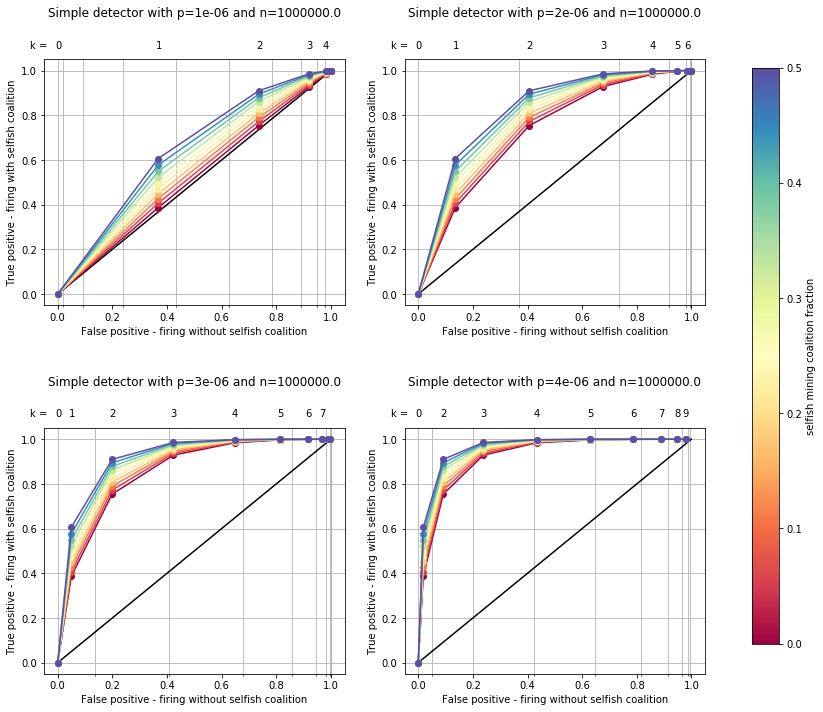

In [505]:
probabilities = [1e-6, 2e-6, 3e-6, 4e-6]
fig = plt.figure(figsize=(15,10))
ax1 = plt.subplot2grid((2, 3), (0, 0))
ax2 = plt.subplot2grid((2, 3), (0, 1))
ax3 = plt.subplot2grid((2, 3), (1, 0))
ax4 = plt.subplot2grid((2, 3), (1, 1))
axes = [ax1, ax2, ax3, ax4]
x, y = 0, 0
for inx, elt in enumerate(probabilities):
    ax = axes[inx]
    ax.set_xlabel("False positive - firing without selfish coalition")
    ax.set_ylabel("True positive - firing with selfish coalition")

    cycle = plt.cm.Spectral(np.linspace(0,1,10))
    ax.set_prop_cycle('color', cycle)
    cm = matplotlib.cm.get_cmap('Spectral')

    line = mlines.Line2D([0, 1], [0, 1], color='black')
    ax.add_line(line)

    ax.set_title("Simple detector with p={} and n={}".format(elt, num_of_shares), y=1.15)
    ax.set_xticks(honest_mine, minor=True)
    ax.xaxis.grid(False, which='major')
    ax.xaxis.grid(True, which='minor')
    ax.yaxis.grid(True, which='major')
    ax.text(-0.1, 1.1, r'k =', fontsize=10)

    honest_mine = get_data_arr(num_of_shares, elt, 10)
    last = None
    for inx, hval in enumerate(honest_mine):
        if last == None:
            last = hval
        else:
            if hval - last < 0.025:
                last = hval
                continue

        ax.text(hval - 0.01, 1.1, inx, fontsize=10)
        last = hval


    for inx, q in enumerate(q_frac_of_mal):
        malice_mine = get_data_arr(num_of_shares, prob_of_block * (1 - q), 10)
        im = ax.plot(honest_mine, malice_mine, marker="o")


ax5  = fig.add_axes([0.7,0.1,0.025,0.8])
norm = matplotlib.colors.Normalize(vmin=0,vmax=0.5)
cb1  = matplotlib.colorbar.ColorbarBase(ax5,cmap=cm,norm=norm,orientation='vertical', label="selfish mining coalition fraction")
fig.tight_layout()
plt.subplots_adjust(hspace=0.5, wspace=0.2)
plt.savefig('/Users/drewstone/Desktop/simpleROC.png', dpi=300)

<Figure size 864x720 with 0 Axes>

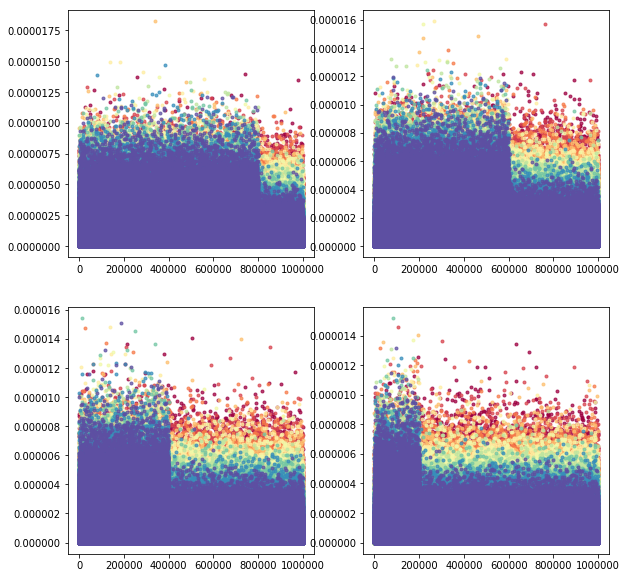

<Figure size 1080x720 with 0 Axes>

In [584]:
# We want to simulate n share arrivals
# and plot their time-dynamics. We will
# also plot their histogram as we change
# it through time.
exponential_rate = 1/1e6
total_shares = 1e6

# plotting setup
change_times = [0.2, 0.4, 0.6, 0.8]
plt.clf()
fig = plt.figure(figsize=(15,10))
ax1 = plt.subplot2grid((2, 3), (0, 0))
ax2 = plt.subplot2grid((2, 3), (0, 1))
ax3 = plt.subplot2grid((2, 3), (1, 0))
ax4 = plt.subplot2grid((2, 3), (1, 1))
axes = [ax1, ax2, ax3, ax4]
fig = plt.figure(figsize=(15,10))

num_of_shares = 1e6
for inx, elt in enumerate(change_times):
    ax = axes[inx]
#     ax.set_xlabel("False positive - firing without selfish coalition")
#     ax.set_ylabel("True positive - firing with selfish coalition")

    cycle = plt.cm.Spectral(np.linspace(0,1,10))
    ax.set_prop_cycle('color', cycle)
    cm = matplotlib.cm.get_cmap('Spectral')

#     line = mlines.Line2D([0, 1], [0, 1], color='black')
#     ax.add_line(line)

#     ax.set_title("Share arrival times with change at c={} and rate r={}".format(elt, exponential_rate), y=1.15)
#     ax.set_xticks(honest_mine, minor=True)
#     ax.xaxis.grid(False, which='major')
#     ax.xaxis.grid(True, which='minor')
#     ax.yaxis.grid(True, which='major')
#     ax.text(-0.1, 1.1, r'k =', fontsize=10)

    for inx, q in enumerate(q_frac_of_mal):
        change_lambda = exponential_rate * (1 - q)
        
        # amounts of shares the come before and after change point
        before_amount = np.ceil(num_of_shares * (1 - elt))
        after_amount = np.ceil(num_of_shares * elt)
    
        assert(before_amount + after_amount == num_of_shares)
    
        # draw respective amount of shares from proper distributions
        before_draws = np.random.exponential(exponential_rate, size=(int(before_amount)))
        after_draws = np.random.exponential(change_lambda, size=(int(after_amount)))

        ax.plot([i for i in range(int(num_of_shares))], np.concatenate((before_draws, after_draws)), '.', alpha=0.75)


# ax5  = fig.add_axes([0.7,0.1,0.025,0.8])
# norm = matplotlib.colors.Normalize(vmin=0,vmax=0.5)
# cb1  = matplotlib.colorbar.ColorbarBase(ax5,cmap=cm,norm=norm,orientation='vertical', label="selfish mining coalition fraction")
fig.tight_layout()
plt.subplots_adjust(hspace=0.5, wspace=0.2)
# plt.savefig('/Users/drewstone/Desktop/monte.png', dpi=300)

11.0